Basic Review gathering and sentiment anlysis.
Import necessay libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import review csv file

In [92]:
praRev = pd.read_csv('revPrayagCSV.csv')
praRev.shape

(497, 7)

dataset info

In [93]:
praRev.head()

,rating_text,rating,foodie_level_num,review_time_friendly,id,likes,review_text
0,Great!,4.0,2,3 days ago,2400052,0,One of the best biriyani point at Allahabad So...
1,Insane!,5.0,3,4 days ago,2400052,0,Bbbbrrrriiiiiiiyyyyyyaaaannnnniiiiii💕💕💕🔥🔥🔥 the...
2,Great!,4.0,2,4 days ago,2400052,0,"Biryani was really delicious. Also, Raita is a..."
3,Insane!,5.0,2,6 days ago,2400052,0,Eat on is one of the best chicken biryani rest...
4,Insane!,5.0,2,11 days ago,2400052,1,Awesome Biryani And I Like To Eat Here With My...


In [94]:
praRev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 7 columns):
rating_text             497 non-null object
rating                  497 non-null float64
foodie_level_num        497 non-null int64
review_time_friendly    497 non-null object
id                      497 non-null int64
likes                   497 non-null int64
review_text             490 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 27.2+ KB


Explore Dataset

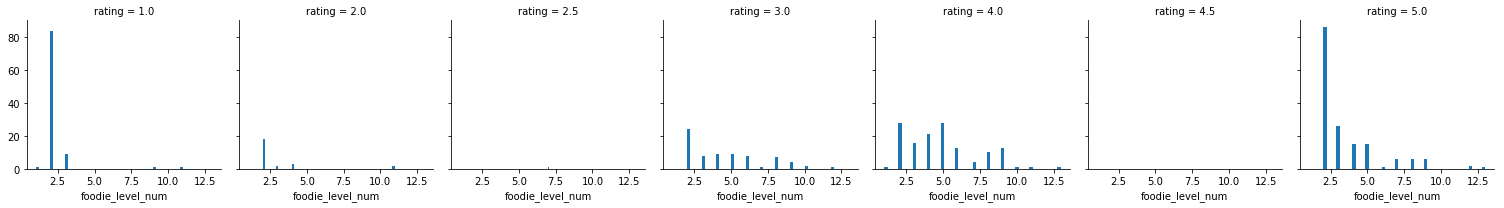

In [95]:
g = sns.FacetGrid(data=praRev, col='rating')
g.map(plt.hist, 'foodie_level_num', bins=50)

It is interesting to note that foodie level 2 and 3 give most of the reviews here.
Also, most of the reviews are either 1 star or 5 star rated.

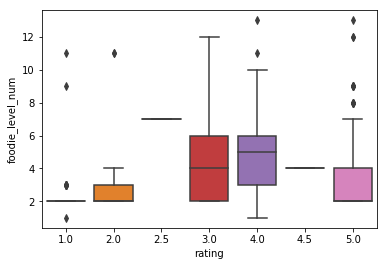

In [96]:
sns.boxplot(x='rating', y='foodie_level_num', data=praRev)

most of the high foodie levels give rating as 3 or 4 star. But this correlation might not be that important for predicting sentiment of a review as, we can sight various outliers here.
We will work on rating_text now.

In [97]:
stars = praRev.groupby('rating').mean()
stars.corr()

,foodie_level_num,id,likes
foodie_level_num,1.000000,-0.644521,0.323646
id,-0.644521,1.000000,-0.770766
likes,0.323646,-0.770766,1.000000


we get correlation between numerical fields only .So we'll try if we can convert some text field to numerical.Heatmap for another grasp of correlation.

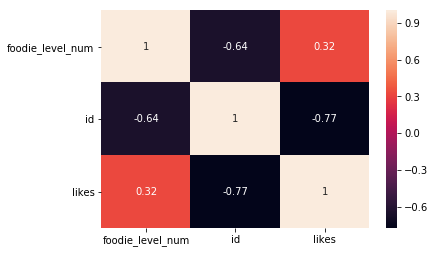

In [98]:
sns.heatmap(data=stars.corr(), annot=True)

As expected no. of likes on a review depend on the foodie_level_num.
Now let's try and do the relatively simple task and first leave some non extreme rated reviews.

In [99]:
praRevext = praRev[(praRev['rating']!=2.5)&(praRev['rating']!=3)]
praRevext.shape

(423, 7)

Get required columns for cassification

In [100]:
X = praRevext['review_text']
Y = praRevext['rating']
X[0]

'One of the best biriyani point at Allahabad So tasty an so friendly and staff is also liable I am so happy good soooo good biriyani yummy Fe...'

TEXT PREPROCESSING
Here our reviews are in plain text.The classification algo will need some feature vector in order to perform the classification task. The simplest way to convert a corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.
The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

In [101]:
import string
import nltk
nltk.download('stopwords')
def text_process(text):

    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''

    nopunc = [char for char in text if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /home/shivam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Function test

In [102]:
sample = "This is just a random sentence, we will like to test if .... we can remove unwanted parts!!"

print(text_process(sample))

['random', 'sentence', 'like', 'test', 'remove', 'unwanted', 'parts']


Now we have to vectorise the text collection into token matrix to enable the scikit learn algos here.

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(encoding="utf-8",analyzer=text_process)
#some shit with rev no. 112 also deleted that row from csv 
Z=[]
for txt in X[0:146]:
    Z.append(txt)
bow = vectorizer.fit(Z)
print(vectorizer.get_feature_names())
# print(bow)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


TypeError: 'float' object is not iterable